In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import Sequential, layers
tf.config.run_functions_eagerly(True)

In [2]:
original_df = pd.read_csv("titanic.csv") 
original_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Replace PassengerID with ID as feature name
df=original_df.copy()
df.rename(columns={"PassengerId":"ID"}, inplace=True)
df=df.drop(columns=["Name","Ticket","Cabin"])
df

,ID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [4]:
print(df.isna().sum())

ID            0
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [5]:
df=df.dropna(subset=["Embarked"])
df

,ID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [6]:
df=df.copy() #to escape warnings
df['MissAge']=df['Age'].isna().astype(int)
df.fillna({'Age':0},inplace=True)
df

,ID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MissAge
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,0
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,0
4,5,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,0
887,888,1,1,female,19.0,0,0,30.0000,S,0
888,889,0,3,female,0.0,1,2,23.4500,S,1
889,890,1,1,male,26.0,0,0,30.0000,C,0


In [7]:
print(df.isna().sum())

ID          0
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
MissAge     0
dtype: int64


In [8]:
#change sex and enbarked to numerical
sex_trans=LabelEncoder()
df["Sex"]=sex_trans.fit_transform(df["Sex"])

emb_trans=LabelEncoder()
df["Embarked"]=emb_trans.fit_transform(df["Embarked"])

df

,ID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MissAge
0,1,0,3,1,22.0,1,0,7.2500,2,0
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,2,0
3,4,1,1,0,35.0,1,0,53.1000,2,0
4,5,0,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2,0
887,888,1,1,0,19.0,0,0,30.0000,2,0
888,889,0,3,0,0.0,1,2,23.4500,2,1
889,890,1,1,1,26.0,0,0,30.0000,0,0


In [9]:
#Normalize the data
Normalize =StandardScaler()
Normalize_cols=["Age","Fare"]
df[Normalize_cols]=Normalize.fit_transform(df[Normalize_cols])
df

,ID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MissAge
0,1,0,3,1,-0.099150,1,0,-0.500240,2,0
1,2,1,1,0,0.812389,1,0,0.788947,0,0
2,3,1,3,0,0.128735,0,0,-0.486650,2,0
3,4,1,1,0,0.641476,1,0,0.422861,2,0
4,5,0,3,1,0.641476,0,0,-0.484133,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,0.185706,0,0,-0.384475,2,0
887,888,1,1,0,-0.270063,0,0,-0.042213,2,0
888,889,0,3,0,-1.352516,1,2,-0.174084,2,1
889,890,1,1,1,0.128735,0,0,-0.042213,0,0


In [10]:
X = df.drop(columns=["Survived"])
y = df["Survived"]
IDs=X["ID"].values.reshape(-1,1).astype(np.float32)
IDs=IDs/1e7

X= X.drop(columns=["ID"]).values.astype(np.float32)
X = np.hstack((X,IDs))
y = to_categorical(y.values, num_classes=2)

X.shape

(889, 9)

In [11]:
y.shape

(889, 2)

In [ ]:
#original code
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 9)
(178, 9)
(711, 2)
(178, 2)


In [ ]:
#new version keeping out points_to_explain and making multiple spits
#Choose 10 indices to hold out for influence explanation
np.random.seed(0)  # for reproducibility
held_out_indices = np.random.choice(len(X), size=10, replace=False)

#Create held-out sets
X_held_out = X[held_out_indices]
y_held_out = y[held_out_indices]

#Remove held-out from X and y for the rest of the pipeline
mask = np.ones(len(X), dtype=bool)
mask[held_out_indices] = False

X_remaining = X[mask]
y_remaining = y[mask]

#4 different train/test split on the remaining data
X_train, X_test, y_train, y_test = train_test_split(
    X_remaining, y_remaining, test_size=0.2, random_state=42
)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_remaining, y_remaining, test_size=0.2, random_state=43
)
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X_remaining, y_remaining, test_size=0.2, random_state=44
)
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X_remaining, y_remaining, test_size=0.2, random_state=45
)

In [13]:
train_ds=tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_ds=tf.data.Dataset.from_tensor_slices((X_test,y_test))
points_to_explain=tf.data.Dataset.from_tensor_slices((X_held_out,y_held_out))

In [35]:
#extra splits
train_ds2=tf.data.Dataset.from_tensor_slices((X_train2,y_train2))
test_ds2=tf.data.Dataset.from_tensor_slices((X_test2,y_test2))

train_ds3=tf.data.Dataset.from_tensor_slices((X_train3,y_train3))
test_ds3=tf.data.Dataset.from_tensor_slices((X_test3,y_test3))

train_ds4=tf.data.Dataset.from_tensor_slices((X_train4,y_train4))
test_ds4=tf.data.Dataset.from_tensor_slices((X_test4,y_test4))

In [14]:
print(len(train_ds))
print(len(test_ds))
print(len(points_to_explain))

703
176
10


In [24]:
model= Sequential([
    layers.Dense(32, activation="relu", input_shape=(9,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(train_ds.batch(32),epochs=10, validation_data=test_ds.batch(32), verbose=2)
model.evaluate(test_ds.batch(32),verbose=2)

Epoch 1/10
23/23 - 0s - loss: 0.6645 - accuracy: 0.6062 - val_loss: 0.6517 - val_accuracy: 0.6348 - 273ms/epoch - 12ms/step
Epoch 2/10
23/23 - 0s - loss: 0.6273 - accuracy: 0.6470 - val_loss: 0.6268 - val_accuracy: 0.6517 - 251ms/epoch - 11ms/step
Epoch 3/10
23/23 - 0s - loss: 0.6102 - accuracy: 0.6540 - val_loss: 0.6113 - val_accuracy: 0.6573 - 251ms/epoch - 11ms/step
Epoch 4/10
23/23 - 0s - loss: 0.5972 - accuracy: 0.6765 - val_loss: 0.5970 - val_accuracy: 0.6798 - 263ms/epoch - 11ms/step
Epoch 5/10
23/23 - 0s - loss: 0.5846 - accuracy: 0.6934 - val_loss: 0.5832 - val_accuracy: 0.7135 - 255ms/epoch - 11ms/step
Epoch 6/10
23/23 - 0s - loss: 0.5721 - accuracy: 0.7060 - val_loss: 0.5698 - val_accuracy: 0.7191 - 252ms/epoch - 11ms/step
Epoch 7/10
23/23 - 0s - loss: 0.5592 - accuracy: 0.7131 - val_loss: 0.5567 - val_accuracy: 0.7528 - 253ms/epoch - 11ms/step
Epoch 8/10
23/23 - 0s - loss: 0.5458 - accuracy: 0.7201 - val_loss: 0.5432 - val_accuracy: 0.7528 - 257ms/epoch - 11ms/step
Epoch 9/

[0.5148359537124634, 0.7808988690376282]

In [15]:
from deel.influenciae.common import InfluenceModel, ExactIHVP
from deel.influenciae.influence import FirstOrderInfluenceCalculator
from deel.influenciae.utils import ORDER
from deel.influenciae.trac_in import TracIn
from keras.losses import BinaryCrossentropy
import warnings


In [ ]:
warnings.filterwarnings('ignore')
tf.autograph.set_verbosity(0)  # Suppress AutoGraph warnings
tf.get_logger().setLevel('ERROR')
unreduced_loss =BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
influence_model= InfluenceModel(model, start_layer=-1, loss_function=unreduced_loss)

#Tutorial 1
ihvp_calculator = ExactIHVP(influence_model, train_dataset=train_ds.shuffle(100).batch(4))
influence_calculator= FirstOrderInfluenceCalculator(influence_model,train_ds.batch(8),ihvp_calculator)

samples_to_explain= test_ds.take(5).batch(1)
expanations_ds= influence_calculator.top_k(samples_to_explain, train_ds.batch(8),k=3, order=ORDER.DESCENDING)

#print usefull samples
for (sample, label), top_k_values, top_k_samples in expanations_ds.as_numpy_iterator():
    #use round instead of int
    sample_id=round(sample[0][-1]*1e7)
    sample_original=original_df[original_df['PassengerId']==sample_id]
    print(f"\nTest Sample ID:{sample_id}")
    print("Original sample from Dataframe:")
    print(sample_original[["Survived"]])
    influential_ids=[round(s[-1]*1e7) for s in top_k_samples[0]]
    for i, (inf_id,score) in enumerate (zip(influential_ids, top_k_values[0])):
        inf_sample_original= original_df[original_df['PassengerId']==inf_id]
        print(f"Influential Sample {i+1} -> ID: {inf_id}, Influence Score: {score}")
        print(inf_sample_original[["Survived"]])


Test Sample ID:282
Original sample from Dataframe:
     Survived
281         0
Influential Sample 1 -> ID: 439, Influence Score: 2.232835292816162
     Survived
438         0
Influential Sample 2 -> ID: 28, Influence Score: 1.9780025482177734
    Survived
27         0
Influential Sample 3 -> ID: 713, Influence Score: 1.084910273551941
     Survived
712         1

Test Sample ID:436
Original sample from Dataframe:
     Survived
435         1
Influential Sample 1 -> ID: 803, Influence Score: 16.515750885009766
     Survived
802         1
Influential Sample 2 -> ID: 306, Influence Score: 15.78598403930664
     Survived
305         1
Influential Sample 3 -> ID: 391, Influence Score: 11.787890434265137
     Survived
390         1

Test Sample ID:40
Original sample from Dataframe:
    Survived
39         1
Influential Sample 1 -> ID: 623, Influence Score: 20.649221420288086
     Survived
622         1
Influential Sample 2 -> ID: 831, Influence Score: 20.59071159362793
     Survived
830     

In [20]:
#TraceIn one
model= Sequential([
    layers.Dense(32, activation="relu", input_shape=(9,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

epochs =10
unreduced_loss_fn=BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
model_list=[]
model_list.append(InfluenceModel(model,start_layer=-1,loss_function=unreduced_loss_fn))
for i in range(epochs):
    model.fit(train_ds.batch(32),epochs=1, validation_data=test_ds.batch(32),verbose=2)
    updated_model=tf.keras.models.clone_model(model)
    updated_model.set_weights(model.get_weights())
    model_list.append(InfluenceModel(model,start_layer=-1,loss_function=unreduced_loss_fn))
model.evaluate(test_ds.batch(32), verbose=2)

23/23 - 0s - loss: 0.7161 - accuracy: 0.4557 - val_loss: 0.6873 - val_accuracy: 0.6404 - 269ms/epoch - 12ms/step
23/23 - 0s - loss: 0.6808 - accuracy: 0.6554 - val_loss: 0.6666 - val_accuracy: 0.6573 - 251ms/epoch - 11ms/step
23/23 - 0s - loss: 0.6544 - accuracy: 0.6512 - val_loss: 0.6416 - val_accuracy: 0.6404 - 253ms/epoch - 11ms/step
23/23 - 0s - loss: 0.6282 - accuracy: 0.6456 - val_loss: 0.6182 - val_accuracy: 0.6573 - 271ms/epoch - 12ms/step
23/23 - 0s - loss: 0.6060 - accuracy: 0.6582 - val_loss: 0.5977 - val_accuracy: 0.6798 - 254ms/epoch - 11ms/step
23/23 - 0s - loss: 0.5877 - accuracy: 0.6807 - val_loss: 0.5793 - val_accuracy: 0.6966 - 251ms/epoch - 11ms/step
23/23 - 0s - loss: 0.5707 - accuracy: 0.6948 - val_loss: 0.5620 - val_accuracy: 0.7247 - 271ms/epoch - 12ms/step
23/23 - 0s - loss: 0.5545 - accuracy: 0.7131 - val_loss: 0.5463 - val_accuracy: 0.7303 - 252ms/epoch - 11ms/step
23/23 - 0s - loss: 0.5393 - accuracy: 0.7271 - val_loss: 0.5321 - val_accuracy: 0.7584 - 256ms/e

[0.5199000239372253, 0.7752808928489685]

In [31]:
tf.config.run_functions_eagerly(True)
influence_calculator= TracIn(model_list, 0.01)

samples_to_explain= test_ds.take(5).batch(1)
explanation_ds=influence_calculator.top_k(samples_to_explain, train_ds.batch(8),k=3,order=ORDER.DESCENDING)

#print influential samples
for (sample, label), top_k_values, top_k_samples in explanation_ds.as_numpy_iterator():
    sample_id=round(sample[0][-1]*1e7)
    sample_original=original_df[original_df["PassengerId"]==sample_id]
    print(f"\nTest Sample ID: {sample_id}")
    print("Original sample from DataFrame:")
    print(sample_original[["Survived"]])
    influential_ids=[round(s[-1]*1e7)for s in top_k_samples[0]]
    for i, (inf_id, score) in enumerate(zip(influential_ids,top_k_values[0])):
        inf_sample_original= original_df[original_df["PassengerId"]==inf_id]
        print(f"Influential Sample {i+1}->ID :{inf_id}, Influence score: {score}")
        print(inf_sample_original[["Survived"]])


Test Sample ID: 282
Original sample from DataFrame:
     Survived
281         0
Influential Sample 1->ID :28, Influence score: 0.03726803511381149
    Survived
27         0
Influential Sample 2->ID :439, Influence score: 0.03538742661476135
     Survived
438         0
Influential Sample 3->ID :528, Influence score: 0.018866661936044693
     Survived
527         0

Test Sample ID: 436
Original sample from DataFrame:
     Survived
435         1
Influential Sample 1->ID :262, Influence score: 0.0575401671230793
     Survived
261         1
Influential Sample 2->ID :234, Influence score: 0.05741751194000244
     Survived
233         1
Influential Sample 3->ID :391, Influence score: 0.03802306950092316
     Survived
390         1

Test Sample ID: 40
Original sample from DataFrame:
    Survived
39         1
Influential Sample 1->ID :262, Influence score: 0.08339717984199524
     Survived
261         1
Influential Sample 2->ID :234, Influence score: 0.06541106849908829
     Survived
233      

<h1>Explore distribution</h1>

In [16]:
#Shared model across 2 methods
model= Sequential([
    layers.Dense(32, activation="relu", input_shape=(9,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

epochs =10
#model list to use for TracIn checkpoints
unreduced_loss_fn=BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
model_list=[] 
model_list.append(InfluenceModel(model,start_layer=-1,loss_function=unreduced_loss_fn))
for i in range(epochs):
    model.fit(train_ds.batch(32),epochs=1, validation_data=test_ds.batch(32),verbose=2)
    updated_model=tf.keras.models.clone_model(model)
    updated_model.set_weights(model.get_weights())
    model_list.append(InfluenceModel(model,start_layer=-1,loss_function=unreduced_loss_fn))
model.evaluate(test_ds.batch(32), verbose=2)

22/22 - 1s - loss: 0.7513 - accuracy: 0.4111 - val_loss: 0.6780 - val_accuracy: 0.6364 - 1s/epoch - 48ms/step
22/22 - 0s - loss: 0.6553 - accuracy: 0.6430 - val_loss: 0.6304 - val_accuracy: 0.6420 - 246ms/epoch - 11ms/step
22/22 - 0s - loss: 0.6225 - accuracy: 0.6387 - val_loss: 0.6021 - val_accuracy: 0.6761 - 249ms/epoch - 11ms/step
22/22 - 0s - loss: 0.6041 - accuracy: 0.6586 - val_loss: 0.5783 - val_accuracy: 0.6989 - 243ms/epoch - 11ms/step
22/22 - 0s - loss: 0.5898 - accuracy: 0.6828 - val_loss: 0.5571 - val_accuracy: 0.7273 - 243ms/epoch - 11ms/step
22/22 - 0s - loss: 0.5767 - accuracy: 0.6984 - val_loss: 0.5388 - val_accuracy: 0.7273 - 245ms/epoch - 11ms/step
22/22 - 0s - loss: 0.5633 - accuracy: 0.7055 - val_loss: 0.5178 - val_accuracy: 0.7443 - 246ms/epoch - 11ms/step
22/22 - 0s - loss: 0.5500 - accuracy: 0.7127 - val_loss: 0.4958 - val_accuracy: 0.7670 - 267ms/epoch - 12ms/step
22/22 - 0s - loss: 0.5369 - accuracy: 0.7255 - val_loss: 0.4736 - val_accuracy: 0.7898 - 249ms/epoc

[0.4533301591873169, 0.8125]

In [17]:
#Influence calculators
warnings.filterwarnings('ignore')
tf.autograph.set_verbosity(0)  # Suppress AutoGraph warnings
tf.get_logger().setLevel('ERROR')

#TracIn
influence_calculator_TracIn= TracIn(model_list, 0.01)

#FirstOrder
unreduced_loss =BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
influence_model_FirstOrder= InfluenceModel(model, start_layer=-1, loss_function=unreduced_loss)
ihvp_calculator = ExactIHVP(influence_model_FirstOrder, train_ds.take(1000).batch(16))
influence_calculator_FirstOrder = FirstOrderInfluenceCalculator(influence_model_FirstOrder, train_ds, ihvp_calculator)

In [18]:
#Influence scores of all samples of the training set
warnings.filterwarnings('ignore')
tf.autograph.set_verbosity(0)  # Suppress AutoGraph warnings
tf.get_logger().setLevel('ERROR')

#TracIn
training_points_inluence_TracIn= influence_calculator_TracIn.compute_influence_values(train_ds.batch(8))

#FirstOrder
training_points_inluence_FirstOrder = influence_calculator_FirstOrder.compute_influence_values(train_ds.batch(8))

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

In [20]:


def analyze_score_distribution(dataset, sample_size=None, figsize=(15, 12)):
    """
    Analyze and visualize score distribution from a TF dataset of (sample, score) tuples.
    
    Args:
        dataset: tf.data.Dataset containing (sample, score) tuples
        sample_size: Number of samples to extract (None for all data)
        figsize: Figure size for plots
    """
    
    # Extract scores from the dataset
    print("Extracting scores from dataset...")
    scores = []
    
    # Handle batched data
    for batch in dataset:
        if isinstance(batch, tuple) and len(batch) == 2:
            _, batch_scores = batch
            # Convert to numpy and flatten if needed
            batch_scores_np = batch_scores.numpy()
            if batch_scores_np.ndim > 1:
                batch_scores_np = batch_scores_np.flatten()
            scores.extend(batch_scores_np)
        
        if sample_size and len(scores) >= sample_size:
            scores = scores[:sample_size]
            break
    
    scores = np.array(scores)
    print(f"Extracted {len(scores)} scores")
    
    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=figsize)
    fig.suptitle('Score Distribution Analysis', fontsize=16, fontweight='bold')
    
    # 1. Histogram with KDE
    ax1 = axes[0, 0]
    ax1.hist(scores, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Add KDE curve
    kde = stats.gaussian_kde(scores)
    x_range = np.linspace(scores.min(), scores.max(), 200)
    ax1.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
    ax1.set_title('Score Distribution with KDE')
    ax1.set_xlabel('Score')
    ax1.set_ylabel('Density')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Box plot with outlier detection
    ax2 = axes[0, 1]
    box_plot = ax2.boxplot(scores, patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightcoral')
    ax2.set_title('Box Plot (Outlier Detection)')
    ax2.set_ylabel('Score')
    ax2.grid(True, alpha=0.3)
    
    # 3. Log-scale histogram (for tail analysis)
    ax3 = axes[0, 2]
    # Remove zeros and negative values for log scale
    positive_scores = scores[scores > 0] if np.any(scores > 0) else scores + abs(scores.min()) + 1e-10
    ax3.hist(positive_scores, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    ax3.set_yscale('log')
    ax3.set_title('Log-Scale Histogram')
    ax3.set_xlabel('Score')
    ax3.set_ylabel('Frequency (log scale)')
    ax3.grid(True, alpha=0.3)
    
    # 4. Rank-order plot (Zipf-like analysis)
    ax4 = axes[1, 0]
    sorted_scores = np.sort(scores)[::-1]  # Sort in descending order
    ranks = np.arange(1, len(sorted_scores) + 1)
    ax4.loglog(ranks, sorted_scores, 'b-', alpha=0.7, linewidth=1)
    ax4.set_title('Rank-Order Plot (Log-Log)')
    ax4.set_xlabel('Rank (log scale)')
    ax4.set_ylabel('Score (log scale)')
    ax4.grid(True, alpha=0.3)
    
    # 5. Cumulative distribution
    ax5 = axes[1, 1]
    sorted_scores_asc = np.sort(scores)
    cumulative_prob = np.arange(1, len(sorted_scores_asc) + 1) / len(sorted_scores_asc)
    ax5.plot(sorted_scores_asc, cumulative_prob, 'g-', linewidth=2)
    ax5.set_title('Cumulative Distribution Function')
    ax5.set_xlabel('Score')
    ax5.set_ylabel('Cumulative Probability')
    ax5.grid(True, alpha=0.3)
    
    # 6. Q-Q plot for normality check
    ax6 = axes[1, 2]
    stats.probplot(scores, dist="norm", plot=ax6)
    ax6.set_title('Q-Q Plot (Normality Check)')
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\n" + "="*50)
    print("DETAILED STATISTICS")
    print("="*50)
    
    # Basic statistics
    print(f"Sample size: {len(scores):,}")
    print(f"Mean: {np.mean(scores):.4f}")
    print(f"Median: {np.median(scores):.4f}")
    print(f"Standard deviation: {np.std(scores):.4f}")
    print(f"Min: {np.min(scores):.4f}")
    print(f"Max: {np.max(scores):.4f}")
    print(f"Range: {np.ptp(scores):.4f}")
    
    # Percentiles
    percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
    print(f"\nPercentiles:")
    for p in percentiles:
        print(f"  {p:2d}th: {np.percentile(scores, p):.4f}")
    
    # Skewness and kurtosis
    skewness = stats.skew(scores)
    kurtosis = stats.kurtosis(scores)
    print(f"\nDistribution shape:")
    print(f"Skewness: {skewness:.4f} ({'right-skewed' if skewness > 0 else 'left-skewed' if skewness < 0 else 'symmetric'})")
    print(f"Kurtosis: {kurtosis:.4f} ({'heavy-tailed' if kurtosis > 0 else 'light-tailed' if kurtosis < 0 else 'normal-tailed'})")
    
    # Tail analysis
    print(f"\nTail Analysis:")
    top_1_percent = np.percentile(scores, 99)
    top_5_percent = np.percentile(scores, 95)
    top_10_percent = np.percentile(scores, 90)
    
    tail_1_pct = scores[scores >= top_1_percent]
    tail_5_pct = scores[scores >= top_5_percent]
    tail_10_pct = scores[scores >= top_10_percent]
    
    print(f"Top 1% threshold: {top_1_percent:.4f} ({len(tail_1_pct)} samples)")
    print(f"Top 5% threshold: {top_5_percent:.4f} ({len(tail_5_pct)} samples)")
    print(f"Top 10% threshold: {top_10_percent:.4f} ({len(tail_10_pct)} samples)")
    
    # Concentration analysis
    total_sum = np.sum(scores) if np.sum(scores) > 0 else 1
    top_1_pct_contribution = np.sum(tail_1_pct) / total_sum * 100
    top_5_pct_contribution = np.sum(tail_5_pct) / total_sum * 100
    top_10_pct_contribution = np.sum(tail_10_pct) / total_sum * 100
    
    print(f"\nConcentration (% of total score mass):")
    print(f"Top 1% contributes: {top_1_pct_contribution:.2f}%")
    print(f"Top 5% contributes: {top_5_pct_contribution:.2f}%")
    print(f"Top 10% contributes: {top_10_pct_contribution:.2f}%")
    
    # Power law test (for rank-order plot)
    if len(scores) > 100:
        try:
            # Simple power law test using linear regression on log-log scale
            log_ranks = np.log(ranks[:len(ranks)//2])  # Use first half to avoid noise
            log_scores = np.log(sorted_scores[:len(ranks)//2])
            
            # Remove any infinite values
            valid_idx = np.isfinite(log_ranks) & np.isfinite(log_scores)
            if np.sum(valid_idx) > 10:
                slope, intercept, r_value, p_value, std_err = stats.linregress(
                    log_ranks[valid_idx], log_scores[valid_idx]
                )
                print(f"\nPower Law Analysis (Rank-Order):")
                print(f"Slope (power law exponent): {slope:.4f}")
                print(f"R-squared: {r_value**2:.4f}")
                print(f"P-value: {p_value:.4e}")
                
                if abs(slope) > 0.5 and r_value**2 > 0.8:
                    print("Strong evidence of power law distribution (potential long tail)")
                elif abs(slope) > 0.3 and r_value**2 > 0.6:
                    print("Moderate evidence of power law distribution")
                else:
                    print("Weak evidence of power law distribution")
        except:
            print("Could not perform power law analysis")
    
    # Normality tests
    print(f"\nNormality Tests:")
    try:
        shapiro_stat, shapiro_p = stats.shapiro(scores[:5000] if len(scores) > 5000 else scores)
        print(f"Shapiro-Wilk test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4e}")
        
        ks_stat, ks_p = stats.kstest(scores, 'norm', args=(np.mean(scores), np.std(scores)))
        print(f"Kolmogorov-Smirnov test: statistic={ks_stat:.4f}, p-value={ks_p:.4e}")
        
        if shapiro_p < 0.05 or ks_p < 0.05:
            print("Distribution is NOT normal (p < 0.05)")
        else:
            print("Distribution may be normal (p >= 0.05)")
    except:
        print("Could not perform normality tests")
    
    return scores

# Example usage:
# Assuming your dataset is named 'dataset'
# scores = analyze_score_distribution(dataset, sample_size=10000)

def create_additional_tail_analysis(scores, figsize=(12, 8)):
    """
    Additional focused analysis on tail behavior and score dropoff.
    """
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle('Detailed Tail Analysis', fontsize=14, fontweight='bold')
    
    # 1. Survival function (1 - CDF)
    ax1 = axes[0, 0]
    sorted_scores = np.sort(scores)[::-1]
    survival_prob = np.arange(len(sorted_scores)) / len(sorted_scores)
    ax1.semilogy(sorted_scores, 1 - survival_prob, 'b-', linewidth=2)
    ax1.set_title('Survival Function (Log Scale)')
    ax1.set_xlabel('Score')
    ax1.set_ylabel('P(Score >= x)')
    ax1.grid(True, alpha=0.3)
    
    # 2. Score differences (dropoff rate)
    ax2 = axes[0, 1]
    score_diffs = np.diff(sorted_scores)  # Differences between consecutive scores
    ax2.plot(range(len(score_diffs)), -score_diffs, 'r-', alpha=0.7)
    ax2.set_title('Score Dropoff Rate')
    ax2.set_xlabel('Rank')
    ax2.set_ylabel('Score Difference (Dropoff)')
    ax2.grid(True, alpha=0.3)
    
    # 3. Percentile plot
    ax3 = axes[1, 0]
    percentiles = np.arange(1, 100)
    percentile_values = [np.percentile(scores, p) for p in percentiles]
    ax3.plot(percentiles, percentile_values, 'g-', linewidth=2)
    ax3.set_title('Percentile Plot')
    ax3.set_xlabel('Percentile')
    ax3.set_ylabel('Score Value')
    ax3.grid(True, alpha=0.3)
    
    # 4. Tail ratio analysis
    ax4 = axes[1, 1]
    thresholds = np.linspace(np.percentile(scores, 50), np.percentile(scores, 99), 50)
    tail_proportions = [np.mean(scores >= t) for t in thresholds]
    ax4.plot(thresholds, tail_proportions, 'purple', linewidth=2)
    ax4.set_title('Tail Proportion vs Threshold')
    ax4.set_xlabel('Score Threshold')
    ax4.set_ylabel('Proportion Above Threshold')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Usage example:
# scores = analyze_score_distribution(your_dataset)
# create_additional_tail_analysis(scores)

<h2>score distribution analysis TracIn</h2>

Extracting scores from dataset...
Extracted 703 scores


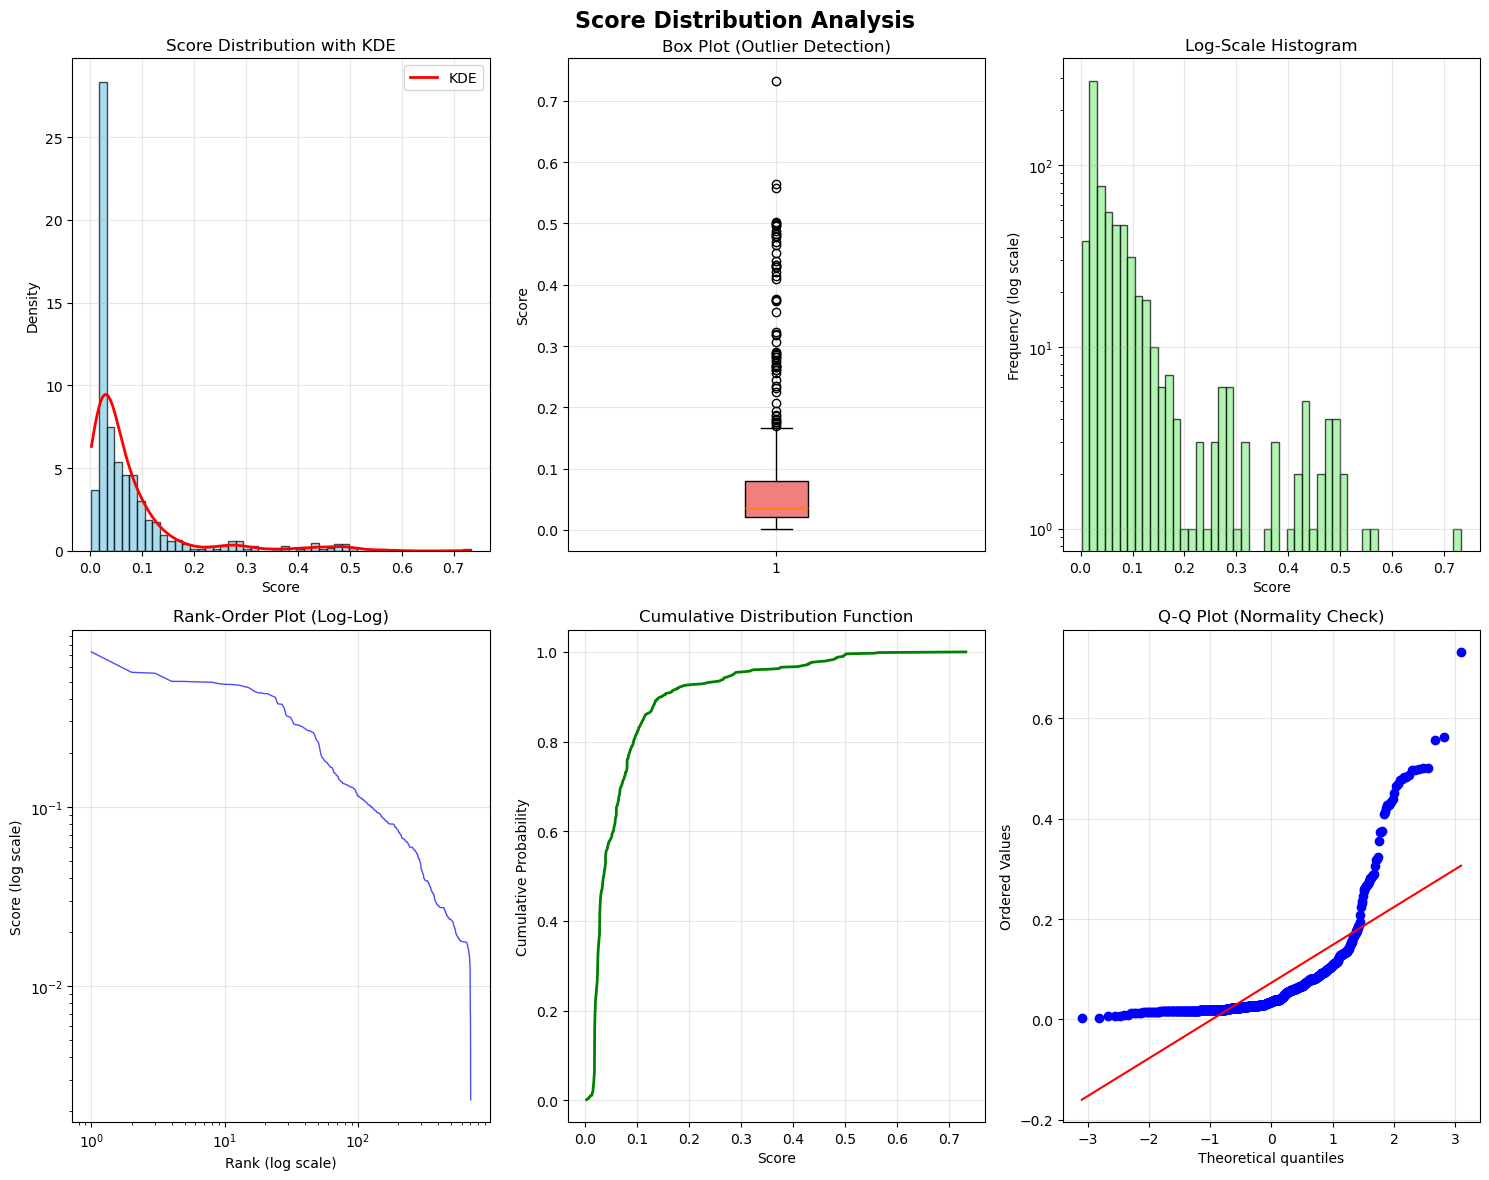


DETAILED STATISTICS
Sample size: 703
Mean: 0.0731
Median: 0.0355
Standard deviation: 0.0980
Min: 0.0023
Max: 0.7327
Range: 0.7304

Percentiles:
   1th: 0.0125
   5th: 0.0165
  10th: 0.0176
  25th: 0.0216
  50th: 0.0355
  75th: 0.0803
  90th: 0.1468
  95th: 0.2853
  99th: 0.4963

Distribution shape:
Skewness: 3.1064 (right-skewed)
Kurtosis: 10.5522 (heavy-tailed)

Tail Analysis:
Top 1% threshold: 0.4963 (8 samples)
Top 5% threshold: 0.2853 (36 samples)
Top 10% threshold: 0.1468 (71 samples)

Concentration (% of total score mass):
Top 1% contributes: 8.47%
Top 5% contributes: 30.07%
Top 10% contributes: 44.28%

Power Law Analysis (Rank-Order):
Slope (power law exponent): -0.6993
R-squared: 0.9377
P-value: 1.9796e-212
Strong evidence of power law distribution (potential long tail)

Normality Tests:
Shapiro-Wilk test: statistic=0.5896, p-value=1.1164e-37
Kolmogorov-Smirnov test: statistic=0.2581, p-value=8.7815e-42
Distribution is NOT normal (p < 0.05)


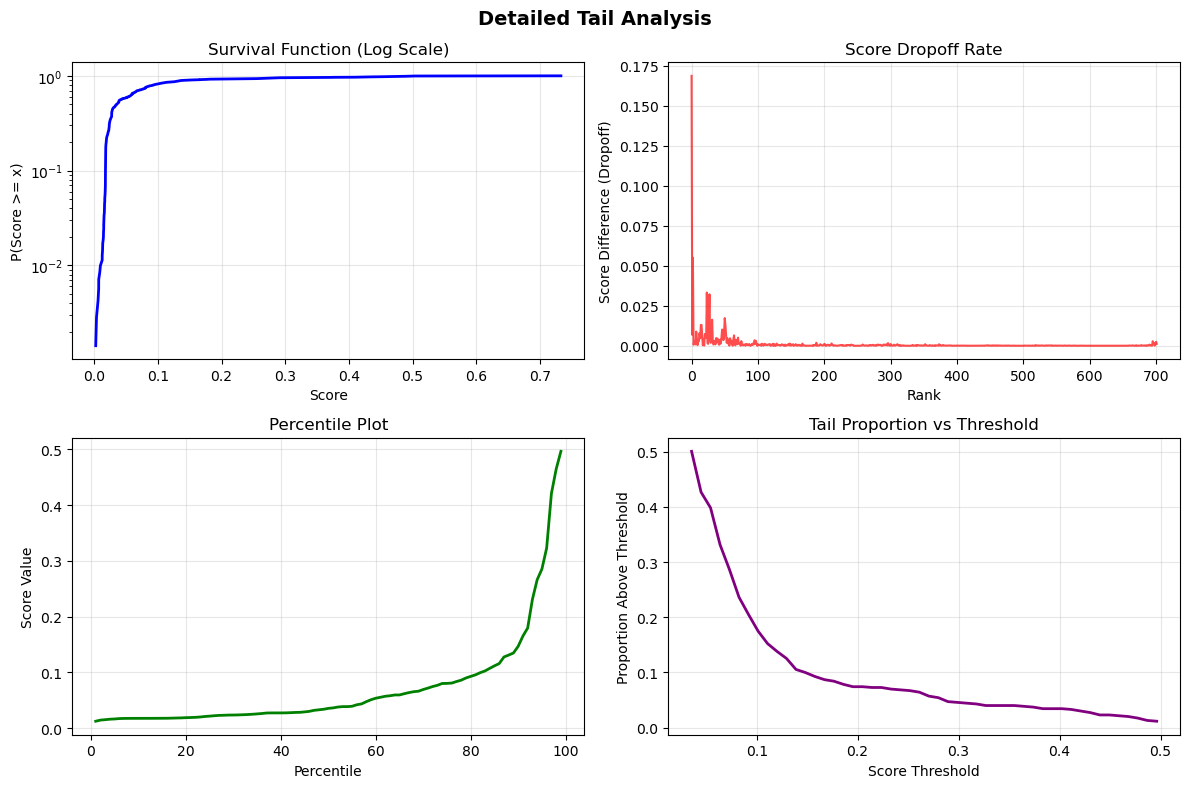

In [21]:
#plot influence scores training set TracIn rs42
scores = analyze_score_distribution(training_points_inluence_TracIn)
create_additional_tail_analysis(scores)

<h2>score distribution analysis FirstOrderInfluence</h2>

Extracting scores from dataset...
Extracted 703 scores


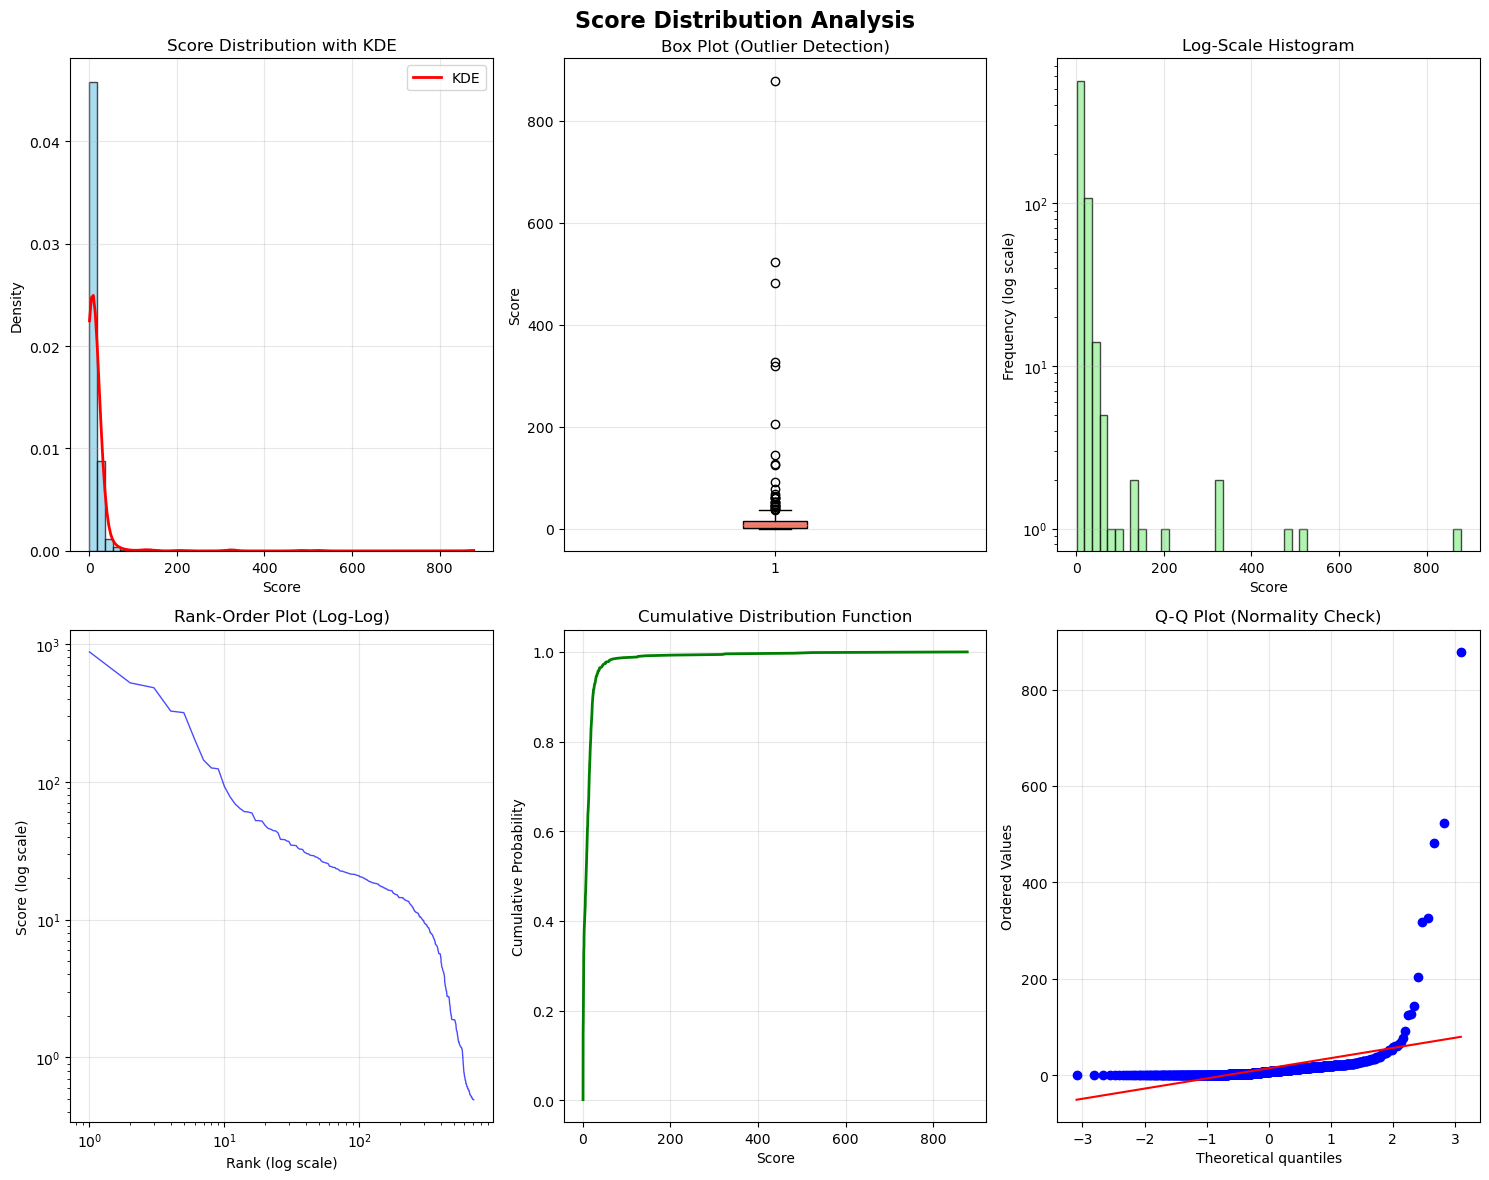


DETAILED STATISTICS
Sample size: 703
Mean: 14.4752
Median: 7.4904
Standard deviation: 47.5927
Min: 0.4917
Max: 878.0708
Range: 877.5791

Percentiles:
   1th: 0.4938
   5th: 0.5249
  10th: 0.6020
  25th: 1.5524
  50th: 7.4904
  75th: 15.7834
  90th: 22.7605
  95th: 32.4819
  99th: 126.1667

Distribution shape:
Skewness: 12.5351 (right-skewed)
Kurtosis: 188.7054 (heavy-tailed)

Tail Analysis:
Top 1% threshold: 126.1667 (8 samples)
Top 5% threshold: 32.4819 (36 samples)
Top 10% threshold: 22.7605 (71 samples)

Concentration (% of total score mass):
Top 1% contributes: 29.52%
Top 5% contributes: 43.55%
Top 10% contributes: 52.75%

Power Law Analysis (Rank-Order):
Slope (power law exponent): -0.6622
R-squared: 0.9527
P-value: 2.6206e-233
Strong evidence of power law distribution (potential long tail)

Normality Tests:
Shapiro-Wilk test: statistic=0.2002, p-value=2.4312e-47
Kolmogorov-Smirnov test: statistic=0.3844, p-value=5.4977e-94
Distribution is NOT normal (p < 0.05)


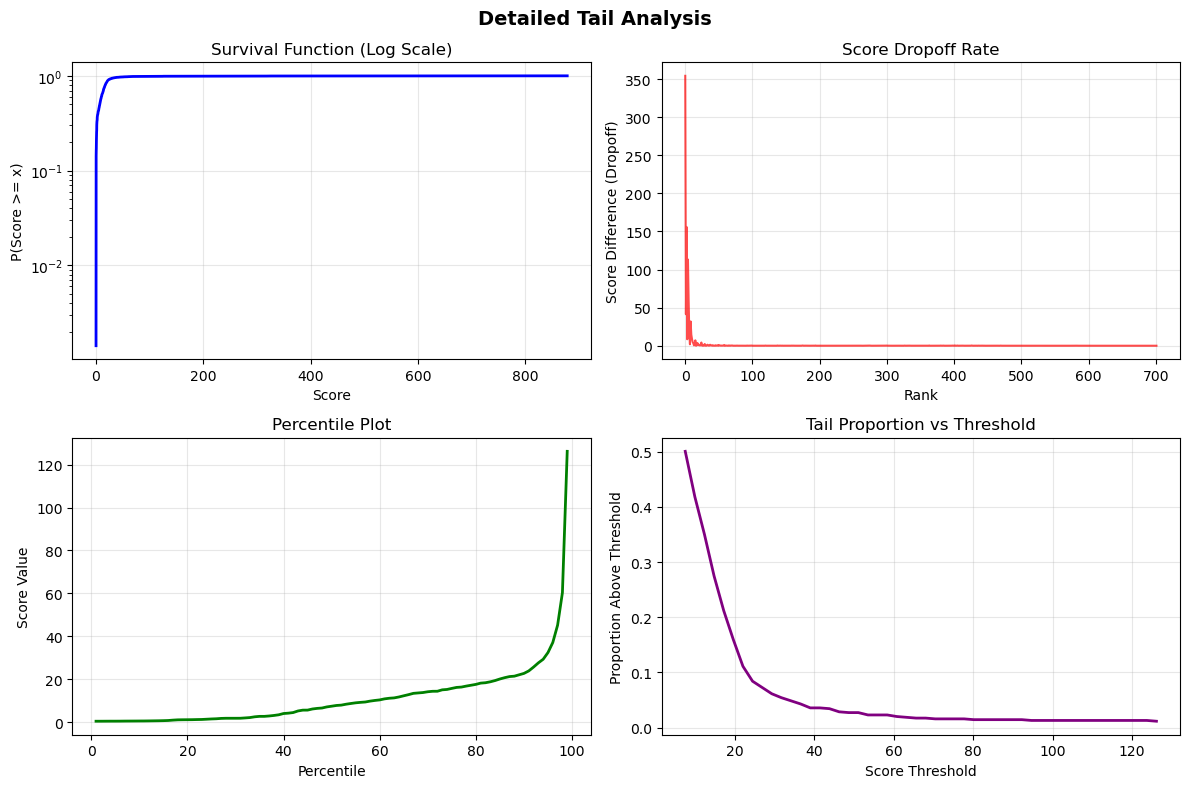

In [22]:
#plot influence scores training set FirstOrder rs42
scores = analyze_score_distribution(training_points_inluence_FirstOrder)
create_additional_tail_analysis(scores)

<h1>Consistency between methods</h1>

<h2>top 25 most influencial samples training set comparison across 2 methods</h2>

In [23]:
#TracIn
top_k_influential_TracIn = influence_calculator_TracIn.compute_top_k_from_training_dataset(train_ds.batch(16), k=25, order=ORDER.DESCENDING)
#FirstOrder
top_k_influential_First_Order = influence_calculator_FirstOrder.compute_top_k_from_training_dataset(train_ds.batch(16), k=25, order=ORDER.DESCENDING)

In [24]:
#i put the results in 2 lists containing tuple(sample_id,score)
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

#TracIn
top_k_influential_TracIn_list=[]
for i, (sample, score) in enumerate(zip(*[tf.unstack(t, axis=0) for t in top_k_influential_TracIn])):
    print(f"rank {i}:")
    sample_id=round(sample[-1]*1e7)
    print(f"  Sample id: {sample_id}")
    print(f"  score : {score}")
    top_k_influential_TracIn_list.append((sample_id,score))

#FirstOrder
top_k_influential_First_Order_list=[]
for i, (sample, score) in enumerate(zip(*[tf.unstack(t, axis=0) for t in top_k_influential_First_Order])):
    print(f"rank {i}:")
    sample_id=round(sample[-1]*1e7)
    print(f"  Sample id: {sample_id}")
    print(f"  score : {score}")
    top_k_influential_First_Order_list.append((sample_id,score))

rank 0:
  Sample id: 439.0
  score : 0.7327366471290588
rank 1:
  Sample id: 339.0
  score : 0.5638957619667053
rank 2:
  Sample id: 415.0
  score : 0.5570840239524841
rank 3:
  Sample id: 570.0
  score : 0.5019869208335876
rank 4:
  Sample id: 430.0
  score : 0.5013303756713867
rank 5:
  Sample id: 262.0
  score : 0.4988253712654114
rank 6:
  Sample id: 745.0
  score : 0.4972603917121887
rank 7:
  Sample id: 272.0
  score : 0.4964289367198944
rank 8:
  Sample id: 287.0
  score : 0.4875996708869934
rank 9:
  Sample id: 82.0
  score : 0.48321735858917236
rank 10:
  Sample id: 805.0
  score : 0.4828272759914398
rank 11:
  Sample id: 147.0
  score : 0.4801330864429474
rank 12:
  Sample id: 822.0
  score : 0.4772934317588806
rank 13:
  Sample id: 128.0
  score : 0.46938058733940125
rank 14:
  Sample id: 268.0
  score : 0.46474283933639526
rank 15:
  Sample id: 392.0
  score : 0.4517277777194977
rank 16:
  Sample id: 284.0
  score : 0.4386756122112274
rank 17:
  Sample id: 205.0
  score : 0

In [25]:
import tensorflow as tf
import numpy as np
from scipy.stats import kendalltau, spearmanr
from sklearn.metrics import ndcg_score
from typing import List, Tuple, Dict, Set
import warnings

In [26]:
def extract_common_elements(list1: List[Tuple], list2: List[Tuple]) -> Tuple[List[Tuple], List[Tuple]]:
    """
    Extract common elements from two ranked lists based on IDs.
    Works with both tensors and normal numbers (int/float) in the tuples.
    
    Args:
        list1, list2: Lists of tuples (id, score), where id can be a tensor or a number.
    
    Returns:
        Tuple of filtered lists containing only common elements, preserving original order.
    """
    def get_id(item):
        # Handle case where item[0] is a tensor
        if hasattr(item[0], 'numpy'):
            return float(item[0].numpy())
        # Handle case where item[0] is a number (int/float)
        else:
            return float(item[0])
    
    # Extract IDs from both lists
    ids1 = {get_id(item) for item in list1}
    ids2 = {get_id(item) for item in list2}
    
    # Find common IDs
    common_ids = ids1.intersection(ids2)
    
    # Filter lists to keep only common elements
    filtered_list1 = [item for item in list1 if get_id(item) in common_ids]
    filtered_list2 = [item for item in list2 if get_id(item) in common_ids]
    
    return filtered_list1, filtered_list2

def create_ranking_mappings(filtered_list1: List[Tuple], filtered_list2: List[Tuple]) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Create ranking mappings for correlation analysis.
    Works with both tensors and normal numbers (int/float) in the tuples.
    
    Returns:
        ranks1: Ranking positions of items in list1 (1-based)
        ranks2: Ranking positions of items in list2 (1-based) 
        scores2: Actual scores from list2 (for NDCG calculation)
    """
    def get_id(item):
        # Handle case where item[0] is a tensor
        if hasattr(item[0], 'numpy'):
            return float(item[0].numpy())
        # Handle case where item[0] is a number (int/float)
        else:
            return float(item[0])
    
    def get_score(item):
        # Handle case where item[1] is a tensor
        if hasattr(item[1], 'numpy'):
            return float(item[1].numpy())
        # Handle case where item[1] is a number (int/float)
        else:
            return float(item[1])
    
    # Create ID to rank mapping for both lists
    id_to_rank1 = {get_id(item): idx + 1 for idx, item in enumerate(filtered_list1)}
    id_to_rank2 = {get_id(item): idx + 1 for idx, item in enumerate(filtered_list2)}
    id_to_score2 = {get_id(item): get_score(item) for item in filtered_list2}
    
    # Get common IDs in the order they appear in list1
    common_ids_ordered = [get_id(item) for item in filtered_list1]
    
    # Create aligned ranking arrays
    ranks1 = np.array([id_to_rank1[id_] for id_ in common_ids_ordered])
    ranks2 = np.array([id_to_rank2[id_] for id_ in common_ids_ordered])
    scores2 = np.array([id_to_score2[id_] for id_ in common_ids_ordered])
    
    return ranks1, ranks2, scores2

def calculate_correlation_metrics(list1: List[Tuple], list2: List[Tuple]) -> Dict[str, float]:
    """
    Calculate Kendall Tau, Spearman ρ, and NDCG between two ranked lists.
    
    Args:
        list1, list2: Lists of tuples (id_tensor, score_tensor) ranked by score (descending)
    
    Returns:
        Dictionary with correlation metrics
    """
    # Extract common elements
    filtered_list1, filtered_list2 = extract_common_elements(list1, list2)
    
    if len(filtered_list1) <= 1:
        return {
            'common_elements': len(filtered_list1),
            'kendall_tau': np.nan,
            'kendall_p_value': np.nan,
            'spearman_rho': np.nan,
            'spearman_p_value': np.nan,
            'ndcg': np.nan
        }
    
    # Create ranking mappings
    ranks1, ranks2, scores2 = create_ranking_mappings(filtered_list1, filtered_list2)
    
    # Calculate Kendall Tau
    kendall_tau, kendall_p = kendalltau(ranks1, ranks2)
    
    # Calculate Spearman correlation
    spearman_rho, spearman_p = spearmanr(ranks1, ranks2)
    
    # Calculate NDCG
    # For NDCG, we need to convert rankings to relevance scores
    # We'll use the actual scores from list2 as true relevance
    # and create predicted relevance based on list1's ranking
    
    # Convert rankings to relevance scores (higher rank = lower relevance score)
    # We'll use a simple transformation: max_rank + 1 - rank
    max_rank = len(ranks1)
    predicted_relevance = max_rank + 1 - ranks1  # Higher for better ranks in list1
    true_relevance = scores2  # Actual scores from list2
    
    # NDCG expects relevance scores in descending order of prediction
    # We need to reshape for sklearn's ndcg_score function
    ndcg = ndcg_score([true_relevance], [predicted_relevance])
    
    return {
        'common_elements': len(filtered_list1),
        'kendall_tau': kendall_tau,
        'kendall_p_value': kendall_p,
        'spearman_rho': spearman_rho,
        'spearman_p_value': spearman_p,
        'ndcg': ndcg
    }

def print_comparison_results(results: Dict[str, float]):
    """Print formatted comparison results."""
    print("Ranked Lists Comparison Results:")
    print("=" * 40)
    print(f"Common elements: {results['common_elements']}")
    print()
    print("Correlation Metrics:")
    print(f"Kendall Tau: {results['kendall_tau']:.4f} (p-value: {results['kendall_p_value']:.4f})")
    print(f"Spearman ρ:  {results['spearman_rho']:.4f} (p-value: {results['spearman_p_value']:.4f})")
    print(f"NDCG:        {results['ndcg']:.4f}")
    print()
    print("Interpretation:")
    print("- Values closer to 1 indicate strong positive correlation")
    print("- Values closer to -1 indicate strong negative correlation") 
    print("- Values closer to 0 indicate weak correlation")
    print("- NDCG ranges from 0 to 1, with 1 being perfect ranking")

In [27]:
results = calculate_correlation_metrics(top_k_influential_TracIn_list, top_k_influential_First_Order_list)
print_comparison_results(results)

Ranked Lists Comparison Results:
Common elements: 5

Correlation Metrics:
Kendall Tau: 0.0000 (p-value: 1.0000)
Spearman ρ:  0.1000 (p-value: 0.8729)
NDCG:        0.9024

Interpretation:
- Values closer to 1 indicate strong positive correlation
- Values closer to -1 indicate strong negative correlation
- Values closer to 0 indicate weak correlation
- NDCG ranges from 0 to 1, with 1 being perfect ranking


<h2>comparison of the top 20 most influential samples on predictions across  2 methods</h2>

In [29]:
# get 10 test samples to get predictions explainations
#samples_to_explain= test_ds.take(10).batch(1)
samples_to_explain=points_to_explain.batch(1)
#most 10 relevant samples form dataset found wiht TracIn for each test sample
explanation_TraceIn=influence_calculator_TracIn.top_k(samples_to_explain, train_ds.batch(8),k=20,order=ORDER.DESCENDING)
#most 10 relevant samples form dataset found wiht First Order for each test sample
expanations_First_Order= influence_calculator_FirstOrder.top_k(samples_to_explain, train_ds.batch(8),k=20, order=ORDER.DESCENDING)

In [30]:
#prints explainations found with TracIn
explanation_TraceIn_list=[]
for (sample, label), top_k_values, top_k_samples in explanation_TraceIn.as_numpy_iterator():
    sample_id=round(sample[0][-1]*1e7)
    print(f"\nTest Sample ID: {sample_id}")
    influential_ids=[round(s[-1]*1e7)for s in top_k_samples[0]]
    explainations=[]
    for i, (inf_id, score) in enumerate(zip(influential_ids,top_k_values[0])):
        print(f"Influential Sample {i+1}->ID :{inf_id}, Influence score: {score}")
        explainations.append((inf_id,score))

    explanation_TraceIn_list.append((sample_id,explainations))


Test Sample ID: 15
Influential Sample 1->ID :439, Influence score: 0.15956957638263702
Influential Sample 2->ID :28, Influence score: 0.10349926352500916
Influential Sample 3->ID :746, Influence score: 0.09791332483291626
Influential Sample 4->ID :639, Influence score: 0.09763657301664352
Influential Sample 5->ID :773, Influence score: 0.09516097605228424
Influential Sample 6->ID :679, Influence score: 0.09492921829223633
Influential Sample 7->ID :206, Influence score: 0.09335627406835556
Influential Sample 8->ID :499, Influence score: 0.0931687206029892
Influential Sample 9->ID :568, Influence score: 0.09137485176324844
Influential Sample 10->ID :420, Influence score: 0.08804391324520111
Influential Sample 11->ID :737, Influence score: 0.08745723217725754
Influential Sample 12->ID :611, Influence score: 0.08732640743255615
Influential Sample 13->ID :565, Influence score: 0.08547402918338776
Influential Sample 14->ID :236, Influence score: 0.08540745079517365
Influential Sample 15->ID

In [ ]:
#prints explainations found with FirstOrder
expanations_First_Order_list=[]
for (sample, label), top_k_values, top_k_samples in expanations_First_Order.as_numpy_iterator():
    sample_id=round(sample[0][-1]*1e7)
    print(f"\nTest Sample ID: {sample_id}")
    influential_ids=[round(s[-1]*1e7)for s in top_k_samples[0]]
    explainations=[]
    for i, (inf_id, score) in enumerate(zip(influential_ids,top_k_values[0])):
        print(f"Influential Sample {i+1}->ID :{inf_id}, Influence score: {score}")
        explainations.append((inf_id,score))

    expanations_First_Order_list.append((sample_id,explainations))


Test Sample ID: 15
Influential Sample 1->ID :206, Influence score: 19.061222076416016
Influential Sample 2->ID :119, Influence score: 14.273391723632812
Influential Sample 3->ID :28, Influence score: 14.242340087890625
Influential Sample 4->ID :420, Influence score: 13.583722114562988
Influential Sample 5->ID :808, Influence score: 12.363118171691895
Influential Sample 6->ID :439, Influence score: 11.969406127929688
Influential Sample 7->ID :405, Influence score: 11.586074829101562
Influential Sample 8->ID :475, Influence score: 10.82596492767334
Influential Sample 9->ID :883, Influence score: 10.819879531860352
Influential Sample 10->ID :565, Influence score: 10.761377334594727
Influential Sample 11->ID :236, Influence score: 10.727890014648438
Influential Sample 12->ID :817, Influence score: 10.473441123962402
Influential Sample 13->ID :294, Influence score: 10.106269836425781
Influential Sample 14->ID :247, Influence score: 9.761850357055664
Influential Sample 15->ID :378, Influenc

In [40]:
keys_to_average = ['common_elements', 'kendall_tau', 'spearman_rho', 'ndcg']
allResults=[]

for (pred_id, list1), (pred_id,list2) in zip(explanation_TraceIn_list,expanations_First_Order_list):
    print(f"\nComparing top 10 most influential samples lists for prediction: {pred_id} found with TracIn and FirstOrder influence:")
    results = calculate_correlation_metrics(list1, list2)
    allResults.append(results)
    print_comparison_results(results)

# Compute the average for each key, ignoring NaNs
averages = {
    key: np.nanmean([d[key] for d in allResults if key in d])
    for key in keys_to_average
}

print(f"\n average values of similarity betweeen the explanations generated with the 2 methods:\n{averages}")


Comparing top 10 most influential samples lists for prediction: 15 found with TracIn and FirstOrder influence:
Ranked Lists Comparison Results:
Common elements: 7

Correlation Metrics:
Kendall Tau: 0.3333 (p-value: 0.3813)
Spearman ρ:  0.4286 (p-value: 0.3374)
NDCG:        0.9279

Interpretation:
- Values closer to 1 indicate strong positive correlation
- Values closer to -1 indicate strong negative correlation
- Values closer to 0 indicate weak correlation
- NDCG ranges from 0 to 1, with 1 being perfect ranking

Comparing top 10 most influential samples lists for prediction: 160 found with TracIn and FirstOrder influence:
Ranked Lists Comparison Results:
Common elements: 1

Correlation Metrics:
Kendall Tau: nan (p-value: nan)
Spearman ρ:  nan (p-value: nan)
NDCG:        nan

Interpretation:
- Values closer to 1 indicate strong positive correlation
- Values closer to -1 indicate strong negative correlation
- Values closer to 0 indicate weak correlation
- NDCG ranges from 0 to 1, with 

<h1>Stability analyisis</h1>

<h3>TracIn<h3>

In [49]:
#Shared model across 2 methods with train/test split number 2
model2= Sequential([
    layers.Dense(32, activation="relu", input_shape=(9,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="sigmoid")
])

model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

epochs =10
#model list to use for TracIn checkpoints
unreduced_loss_fn=BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
model_list2=[] 
model_list2.append(InfluenceModel(model2,start_layer=-1,loss_function=unreduced_loss_fn))
for i in range(epochs):
    model2.fit(train_ds2.batch(32),epochs=1, validation_data=test_ds2.batch(32),verbose=2)
    updated_model=tf.keras.models.clone_model(model2)
    updated_model.set_weights(model2.get_weights())
    model_list2.append(InfluenceModel(model2,start_layer=-1,loss_function=unreduced_loss_fn))
model2.evaluate(test_ds2.batch(32), verbose=2)

22/22 - 0s - loss: 0.6377 - accuracy: 0.6202 - val_loss: 0.6567 - val_accuracy: 0.6136 - 282ms/epoch - 13ms/step
22/22 - 0s - loss: 0.6134 - accuracy: 0.6458 - val_loss: 0.6387 - val_accuracy: 0.6080 - 250ms/epoch - 11ms/step
22/22 - 0s - loss: 0.5952 - accuracy: 0.6671 - val_loss: 0.6213 - val_accuracy: 0.6136 - 246ms/epoch - 11ms/step
22/22 - 0s - loss: 0.5784 - accuracy: 0.6842 - val_loss: 0.6012 - val_accuracy: 0.6648 - 244ms/epoch - 11ms/step
22/22 - 0s - loss: 0.5574 - accuracy: 0.7098 - val_loss: 0.5724 - val_accuracy: 0.6818 - 251ms/epoch - 11ms/step
22/22 - 0s - loss: 0.5384 - accuracy: 0.7155 - val_loss: 0.5533 - val_accuracy: 0.6761 - 250ms/epoch - 11ms/step
22/22 - 0s - loss: 0.5206 - accuracy: 0.7411 - val_loss: 0.5345 - val_accuracy: 0.7159 - 255ms/epoch - 12ms/step
22/22 - 0s - loss: 0.5047 - accuracy: 0.7639 - val_loss: 0.5183 - val_accuracy: 0.7443 - 256ms/epoch - 12ms/step
22/22 - 0s - loss: 0.4906 - accuracy: 0.8009 - val_loss: 0.5051 - val_accuracy: 0.7898 - 255ms/e

[0.4952073395252228, 0.7897727489471436]

In [50]:
#Shared model across 2 methods with train/test split number 3
model3= Sequential([
    layers.Dense(32, activation="relu", input_shape=(9,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="sigmoid")
])

model3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

epochs =10
#model list to use for TracIn checkpoints
unreduced_loss_fn=BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
model_list3=[] 
model_list3.append(InfluenceModel(model3,start_layer=-1,loss_function=unreduced_loss_fn))
for i in range(epochs):
    model3.fit(train_ds3.batch(32),epochs=1, validation_data=test_ds3.batch(32),verbose=2)
    updated_model=tf.keras.models.clone_model(model3)
    updated_model.set_weights(model3.get_weights())
    model_list3.append(InfluenceModel(model3,start_layer=-1,loss_function=unreduced_loss_fn))
model3.evaluate(test_ds3.batch(32), verbose=2)

22/22 - 0s - loss: 0.7316 - accuracy: 0.3926 - val_loss: 0.6996 - val_accuracy: 0.5114 - 260ms/epoch - 12ms/step
22/22 - 0s - loss: 0.6788 - accuracy: 0.6387 - val_loss: 0.6689 - val_accuracy: 0.6477 - 245ms/epoch - 11ms/step
22/22 - 0s - loss: 0.6567 - accuracy: 0.6586 - val_loss: 0.6507 - val_accuracy: 0.6477 - 251ms/epoch - 11ms/step
22/22 - 0s - loss: 0.6387 - accuracy: 0.6657 - val_loss: 0.6344 - val_accuracy: 0.6477 - 249ms/epoch - 11ms/step
22/22 - 0s - loss: 0.6191 - accuracy: 0.6842 - val_loss: 0.6194 - val_accuracy: 0.6591 - 255ms/epoch - 12ms/step
22/22 - 0s - loss: 0.5960 - accuracy: 0.6913 - val_loss: 0.6040 - val_accuracy: 0.6875 - 257ms/epoch - 12ms/step
22/22 - 0s - loss: 0.5729 - accuracy: 0.7055 - val_loss: 0.5845 - val_accuracy: 0.6989 - 248ms/epoch - 11ms/step
22/22 - 0s - loss: 0.5503 - accuracy: 0.7226 - val_loss: 0.5673 - val_accuracy: 0.7273 - 252ms/epoch - 11ms/step
22/22 - 0s - loss: 0.5295 - accuracy: 0.7383 - val_loss: 0.5518 - val_accuracy: 0.7330 - 254ms/e

[0.5367293357849121, 0.7443181872367859]

In [51]:
#TracIn calculator 2
influence_calculator_TracIn2= TracIn(model_list2, 0.01)
#most 10 relevant samples form dataset found wiht TracIn for each test sample with the train/test split 2
explanation_TraceIn2=influence_calculator_TracIn2.top_k(samples_to_explain, train_ds2.batch(8),k=20,order=ORDER.DESCENDING)


In [52]:
#TracIn calculator 3
influence_calculator_TracIn3= TracIn(model_list3, 0.01)
#most 10 relevant samples form dataset found wiht TracIn for each test sample with the train/test split 3
explanation_TraceIn3=influence_calculator_TracIn3.top_k(samples_to_explain, train_ds3.batch(8),k=20,order=ORDER.DESCENDING)

In [53]:
#prints explainations found with TracIn for train/test split 2
explanation_TraceIn_list2=[]
for (sample, label), top_k_values, top_k_samples in explanation_TraceIn2.as_numpy_iterator():
    sample_id=round(sample[0][-1]*1e7)
    print(f"\nTest Sample ID: {sample_id}")
    influential_ids=[round(s[-1]*1e7)for s in top_k_samples[0]]
    explainations=[]
    for i, (inf_id, score) in enumerate(zip(influential_ids,top_k_values[0])):
        print(f"Influential Sample {i+1}->ID :{inf_id}, Influence score: {score}")
        explainations.append((inf_id,score))

    explanation_TraceIn_list2.append((sample_id,explainations))


Test Sample ID: 15
Influential Sample 1->ID :679, Influence score: 0.1663530170917511
Influential Sample 2->ID :141, Influence score: 0.14770875871181488
Influential Sample 3->ID :639, Influence score: 0.1470469981431961
Influential Sample 4->ID :439, Influence score: 0.1461014449596405
Influential Sample 5->ID :611, Influence score: 0.14412753283977509
Influential Sample 6->ID :889, Influence score: 0.14369535446166992
Influential Sample 7->ID :568, Influence score: 0.1412813365459442
Influential Sample 8->ID :864, Influence score: 0.1354149580001831
Influential Sample 9->ID :793, Influence score: 0.13541479408740997
Influential Sample 10->ID :181, Influence score: 0.13541318476200104
Influential Sample 11->ID :886, Influence score: 0.13495609164237976
Influential Sample 12->ID :420, Influence score: 0.13389435410499573
Influential Sample 13->ID :206, Influence score: 0.13045142590999603
Influential Sample 14->ID :499, Influence score: 0.12539176642894745
Influential Sample 15->ID :4

In [54]:
#prints explainations found with TracIn for train/test split 3
explanation_TraceIn_list3=[]
for (sample, label), top_k_values, top_k_samples in explanation_TraceIn3.as_numpy_iterator():
    sample_id=round(sample[0][-1]*1e7)
    print(f"\nTest Sample ID: {sample_id}")
    influential_ids=[round(s[-1]*1e7)for s in top_k_samples[0]]
    explainations=[]
    for i, (inf_id, score) in enumerate(zip(influential_ids,top_k_values[0])):
        print(f"Influential Sample {i+1}->ID :{inf_id}, Influence score: {score}")
        explainations.append((inf_id,score))

    explanation_TraceIn_list3.append((sample_id,explainations))


Test Sample ID: 15
Influential Sample 1->ID :28, Influence score: 0.16432920098304749
Influential Sample 2->ID :528, Influence score: 0.16390953958034515
Influential Sample 3->ID :889, Influence score: 0.1414182037115097
Influential Sample 4->ID :168, Influence score: 0.1399751454591751
Influential Sample 5->ID :737, Influence score: 0.13979803025722504
Influential Sample 6->ID :558, Influence score: 0.1385236382484436
Influential Sample 7->ID :206, Influence score: 0.13631343841552734
Influential Sample 8->ID :643, Influence score: 0.13202045857906342
Influential Sample 9->ID :639, Influence score: 0.13043498992919922
Influential Sample 10->ID :635, Influence score: 0.12779143452644348
Influential Sample 11->ID :439, Influence score: 0.12467724084854126
Influential Sample 12->ID :800, Influence score: 0.12459159642457962
Influential Sample 13->ID :568, Influence score: 0.12338931858539581
Influential Sample 14->ID :255, Influence score: 0.12271382659673691
Influential Sample 15->ID :

In [56]:
keys_to_average = ['common_elements', 'kendall_tau', 'spearman_rho', 'ndcg']
allResults_TracIn_stability=[]
#similarity train/test split 1 and 2
for (pred_id, list1), (pred_id,list2) in zip(explanation_TraceIn_list,explanation_TraceIn_list2):
    print(f"\nComparing top 10 most influential samples lists for prediction: {pred_id} with tracin and model trained on dataset 1 and 2:")
    results = calculate_correlation_metrics(list1, list2)
    allResults_TracIn_stability.append(results)
    print_comparison_results(results)
#similarity train/test split 2 and 3
for (pred_id, list1), (pred_id,list2) in zip(explanation_TraceIn_list2,explanation_TraceIn_list3):
    print(f"\nComparing top 10 most influential samples lists for prediction: {pred_id} with tracin and model trained on dataset 2 and 3:")
    results = calculate_correlation_metrics(list1, list2)
    allResults_TracIn_stability.append(results)
    print_comparison_results(results)
#similarity train/test split 1 and 3
for (pred_id, list1), (pred_id,list2) in zip(explanation_TraceIn_list,explanation_TraceIn_list3):
    print(f"\nComparing top 10 most influential samples lists for prediction: {pred_id} with tracin and model trained on dataset 1 and 3:")
    results = calculate_correlation_metrics(list1, list2)
    allResults_TracIn_stability.append(results)
    print_comparison_results(results)

# Compute the average for each key, ignoring NaNs
averages = {
    key: np.nanmean([d[key] for d in allResults_TracIn_stability if key in d])
    for key in keys_to_average
}

print(f"\n average values of similarity betweeen the explanations generated with the 2 methods:\n{averages}")


Comparing top 10 most influential samples lists for prediction: 15 with tracin and model trained on dataset 1 and 2:
Ranked Lists Comparison Results:
Common elements: 10

Correlation Metrics:
Kendall Tau: 0.1111 (p-value: 0.7275)
Spearman ρ:  0.2121 (p-value: 0.5563)
NDCG:        0.9778

Interpretation:
- Values closer to 1 indicate strong positive correlation
- Values closer to -1 indicate strong negative correlation
- Values closer to 0 indicate weak correlation
- NDCG ranges from 0 to 1, with 1 being perfect ranking

Comparing top 10 most influential samples lists for prediction: 160 with tracin and model trained on dataset 1 and 2:
Ranked Lists Comparison Results:
Common elements: 9

Correlation Metrics:
Kendall Tau: 0.2778 (p-value: 0.3585)
Spearman ρ:  0.3167 (p-value: 0.4064)
NDCG:        0.9624

Interpretation:
- Values closer to 1 indicate strong positive correlation
- Values closer to -1 indicate strong negative correlation
- Values closer to 0 indicate weak correlation
- ND

<h3>First Order Influence</h3>

In [57]:
#FirstOrder calculator 2
unreduced_loss =BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
influence_model_FirstOrder2= InfluenceModel(model2, start_layer=-1, loss_function=unreduced_loss)
ihvp_calculator2 = ExactIHVP(influence_model_FirstOrder2, train_ds2.take(1000).batch(16))
influence_calculator_FirstOrder2 = FirstOrderInfluenceCalculator(influence_model_FirstOrder2, train_ds2, ihvp_calculator2)

In [59]:
#FirstOrder calculator 3
unreduced_loss =BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
influence_model_FirstOrder3= InfluenceModel(model3, start_layer=-1, loss_function=unreduced_loss)
ihvp_calculator3 = ExactIHVP(influence_model_FirstOrder3, train_ds3.take(1000).batch(16))
influence_calculator_FirstOrder3 = FirstOrderInfluenceCalculator(influence_model_FirstOrder3, train_ds3, ihvp_calculator3)

In [60]:
#most 20 relevant samples form dataset found wiht First Order for each test sample in train/test split 2
expanations_First_Order2= influence_calculator_FirstOrder2.top_k(samples_to_explain, train_ds2.batch(8),k=20, order=ORDER.DESCENDING)

#most 20 relevant samples form dataset found wiht First Order for each test sample in train/test split 3
expanations_First_Order3= influence_calculator_FirstOrder3.top_k(samples_to_explain, train_ds3.batch(8),k=20, order=ORDER.DESCENDING)

In [61]:
#prints explainations found with FirstOrder on train/test split 2
expanations_First_Order_list2=[]
for (sample, label), top_k_values, top_k_samples in expanations_First_Order2.as_numpy_iterator():
    sample_id=round(sample[0][-1]*1e7)
    print(f"\nTest Sample ID: {sample_id}")
    influential_ids=[round(s[-1]*1e7)for s in top_k_samples[0]]
    explainations=[]
    for i, (inf_id, score) in enumerate(zip(influential_ids,top_k_values[0])):
        print(f"Influential Sample {i+1}->ID :{inf_id}, Influence score: {score}")
        explainations.append((inf_id,score))

    expanations_First_Order_list2.append((sample_id,explainations))


Test Sample ID: 15
Influential Sample 1->ID :236, Influence score: 11.859014511108398
Influential Sample 2->ID :416, Influence score: 11.801538467407227
Influential Sample 3->ID :565, Influence score: 11.80148696899414
Influential Sample 4->ID :206, Influence score: 11.280003547668457
Influential Sample 5->ID :808, Influence score: 10.520416259765625
Influential Sample 6->ID :50, Influence score: 10.130228042602539
Influential Sample 7->ID :262, Influence score: 9.76746940612793
Influential Sample 8->ID :405, Influence score: 9.688915252685547
Influential Sample 9->ID :403, Influence score: 8.941143989562988
Influential Sample 10->ID :475, Influence score: 8.847206115722656
Influential Sample 11->ID :883, Influence score: 8.795909881591797
Influential Sample 12->ID :265, Influence score: 8.71346378326416
Influential Sample 13->ID :28, Influence score: 8.711565971374512
Influential Sample 14->ID :817, Influence score: 8.61862564086914
Influential Sample 15->ID :39, Influence score: 8.4

In [62]:
#prints explainations found with FirstOrder on train/test split 3
expanations_First_Order_list3=[]
for (sample, label), top_k_values, top_k_samples in expanations_First_Order3.as_numpy_iterator():
    sample_id=round(sample[0][-1]*1e7)
    print(f"\nTest Sample ID: {sample_id}")
    influential_ids=[round(s[-1]*1e7)for s in top_k_samples[0]]
    explainations=[]
    for i, (inf_id, score) in enumerate(zip(influential_ids,top_k_values[0])):
        print(f"Influential Sample {i+1}->ID :{inf_id}, Influence score: {score}")
        explainations.append((inf_id,score))

    expanations_First_Order_list3.append((sample_id,explainations))


Test Sample ID: 15
Influential Sample 1->ID :206, Influence score: 11.860124588012695
Influential Sample 2->ID :710, Influence score: 10.57544994354248
Influential Sample 3->ID :66, Influence score: 10.575312614440918
Influential Sample 4->ID :28, Influence score: 9.682343482971191
Influential Sample 5->ID :889, Influence score: 9.385404586791992
Influential Sample 6->ID :643, Influence score: 9.015708923339844
Influential Sample 7->ID :737, Influence score: 8.465890884399414
Influential Sample 8->ID :800, Influence score: 8.146167755126953
Influential Sample 9->ID :635, Influence score: 7.814767360687256
Influential Sample 10->ID :424, Influence score: 7.701122283935547
Influential Sample 11->ID :298, Influence score: 7.494174480438232
Influential Sample 12->ID :252, Influence score: 7.3627028465271
Influential Sample 13->ID :50, Influence score: 7.234048366546631
Influential Sample 14->ID :168, Influence score: 7.074611663818359
Influential Sample 15->ID :883, Influence score: 7.065

In [63]:
keys_to_average = ['common_elements', 'kendall_tau', 'spearman_rho', 'ndcg']
allResults_FirsOrder_stability=[]
#similarity train/test split 1 and 2
for (pred_id, list1), (pred_id,list2) in zip(expanations_First_Order_list,expanations_First_Order_list2):
    print(f"\nComparing top 10 most influential samples lists for prediction: {pred_id} with tracin and model trained on dataset 1 and 2:")
    results = calculate_correlation_metrics(list1, list2)
    allResults_FirsOrder_stability.append(results)
    print_comparison_results(results)
#similarity train/test split 2 and 3
for (pred_id, list1), (pred_id,list2) in zip(expanations_First_Order_list2,expanations_First_Order_list3):
    print(f"\nComparing top 10 most influential samples lists for prediction: {pred_id} with tracin and model trained on dataset 2 and 3:")
    results = calculate_correlation_metrics(list1, list2)
    allResults_FirsOrder_stability.append(results)
    print_comparison_results(results)
#similarity train/test split 1 and 3
for (pred_id, list1), (pred_id,list2) in zip(expanations_First_Order_list,expanations_First_Order_list3):
    print(f"\nComparing top 10 most influential samples lists for prediction: {pred_id} with tracin and model trained on dataset 1 and 3:")
    results = calculate_correlation_metrics(list1, list2)
    allResults_FirsOrder_stability.append(results)
    print_comparison_results(results)

# Compute the average for each key, ignoring NaNs
averages = {
    key: np.nanmean([d[key] for d in allResults_FirsOrder_stability if key in d])
    for key in keys_to_average
}

print(f"\n average values of similarity betweeen the explanations generated with the 2 methods:\n{averages}")


Comparing top 10 most influential samples lists for prediction: 15 with tracin and model trained on dataset 1 and 2:
Ranked Lists Comparison Results:
Common elements: 12

Correlation Metrics:
Kendall Tau: 0.0303 (p-value: 0.9466)
Spearman ρ:  0.0000 (p-value: 1.0000)
NDCG:        0.9585

Interpretation:
- Values closer to 1 indicate strong positive correlation
- Values closer to -1 indicate strong negative correlation
- Values closer to 0 indicate weak correlation
- NDCG ranges from 0 to 1, with 1 being perfect ranking

Comparing top 10 most influential samples lists for prediction: 160 with tracin and model trained on dataset 1 and 2:
Ranked Lists Comparison Results:
Common elements: 4

Correlation Metrics:
Kendall Tau: 0.6667 (p-value: 0.3333)
Spearman ρ:  0.8000 (p-value: 0.2000)
NDCG:        0.9983

Interpretation:
- Values closer to 1 indicate strong positive correlation
- Values closer to -1 indicate strong negative correlation
- Values closer to 0 indicate weak correlation
- ND